
créer le graphe:
    parser tous les fijciers en ".py"
    deux types d'imports
        from ... import ...
        import ...
sommets -> fichier

aretes -> fichier a importe fichier b

lister les fich


In [2]:
#Dans un terminal écrire :
#pip install --upgrade scipy
# dans jupyter 
# Noyau -> redémarrer
'''
import networkx as nx
from pathlib import Path
G=nx.DiGraph()

nodes=set()
chemin="./networkx-main/networkx/"   #Le chemin du dossier networkx
p=Path(chemin)   #Utilisation de path pour itérer sur un dossier sinon trop dur

laListe=list(p.glob("**/*.py")) #Utilisation de glob pour renvoyer une liste de fichiers .py
listeVoisin={} #Notre petit dico
for chemin in laListe: #Pour chaque chemin de la liste de fichier .py
    sommet=str(chemin).replace("/",".").replace(".py","")
    fichier=open(chemin,"r") #On ouvre le fichier en lecture
    imports=[]
    for line in fichier.readlines(): #Pour chaque ligne du fichier on prend les import et from        
        nodes.add(sommet)
        if line.startswith("from"):
                t=line.split(" ")
                voisin=list(t[1].split("."))
                voisin=t[1].replace(".","")#enleve les points avant les noms de fichiers ".bisect" 
                imports.append(voisin)
                listeVoisin[sommet]=imports
                nodes.add(voisin)
                G.add_edge(sommet,voisin)
        if line.startswith("import"):
                t=line.split(" ")
                voisin=t[1].replace(".","")#enleve les points avant les noms de fichiers ".bisect" 
                imports.append(voisin)
                listeVoisin[sommet]=imports
                nodes.add(voisin)
                G.add_edge(sommet,voisin)
    fichier.close()
nodes.remove('')#enleve les sommets vides
print (G)

#On reprend le code du professeur car notre code ne produit pas assez de sommet.


'''


'\nimport networkx as nx\nfrom pathlib import Path\nG=nx.DiGraph()\n\nnodes=set()\nchemin="./networkx-main/networkx/"   #Le chemin du dossier networkx\np=Path(chemin)   #Utilisation de path pour itérer sur un dossier sinon trop dur\n\nlaListe=list(p.glob("**/*.py")) #Utilisation de glob pour renvoyer une liste de fichiers .py\nlisteVoisin={} #Notre petit dico\nfor chemin in laListe: #Pour chaque chemin de la liste de fichier .py\n    sommet=str(chemin).replace("/",".").replace(".py","")\n    fichier=open(chemin,"r") #On ouvre le fichier en lecture\n    imports=[]\n    for line in fichier.readlines(): #Pour chaque ligne du fichier on prend les import et from        \n        nodes.add(sommet)\n        if line.startswith("from"):\n                t=line.split(" ")\n                voisin=list(t[1].split("."))\n                voisin=t[1].replace(".","")#enleve les points avant les noms de fichiers ".bisect" \n                imports.append(voisin)\n                listeVoisin[sommet]=imp

In [3]:
from os import listdir
from os.path import isfile, join, isdir
dossier="networkx-main"
fichiers = [join(dossier, f) for f in listdir(dossier) if isfile(join(dossier, f)) and ".py" in f]
dossiers = [join(dossier, f) for f in listdir(dossier) if isdir(join(dossier, f))]

In [4]:
from queue import Queue
q = Queue()
q.put(dossier)
liste_fichiers=[]

while not q.empty():
    dossier = q.get()
    fichiers = [join(dossier, f) for f in listdir(dossier) if isfile(join(dossier, f)) and ".py" in f]
    liste_fichiers+=fichiers
    for f in listdir(dossier):
        if isdir(join(dossier, f)):
            q.put(join(dossier, f))

In [5]:
# Résultat du BFS
len(liste_fichiers)

628

In [6]:
# Transformer un chemin sur le disque en un package importé
def to_package(fichier):
    return fichier.replace("/", ".")[14:-3]
    
# Fonction utilisé lorsque l'import dans un fichier commence par un ..
def previous_package(fichier, package):
    fichier = to_package(fichier)
    fichier = fichier[:fichier.rfind(".")]
    #print("ici", fichier[:fichier.rfind(".")]+"."+package[2:])
    return fichier[:fichier.rfind(".")]+"."+package[2:]

# Fonction utilisé lorsque l'import dans un fichier commence par un .
def current_package(fichier, package):
    fichier = to_package(fichier)
    return fichier[:fichier.rfind(".")]+"."+package[1:]

for f in liste_fichiers[:20]:
    print(to_package(f))

setup
networkx.__init__
networkx.lazy_imports
networkx.conftest
networkx.exception
networkx.convert_matrix
networkx.relabel
networkx.convert
doc.conf
tools.team_list
networkx.drawing.nx_agraph
networkx.drawing.__init__
networkx.drawing.nx_pydot
networkx.drawing.nx_pylab
networkx.drawing.layout
networkx.utils.rcm
networkx.utils.__init__
networkx.utils.union_find
networkx.utils.mapped_queue
networkx.utils.random_sequence


In [7]:
import networkx as nx
nodes = set()
G = nx.DiGraph()
for nom_fichier in liste_fichiers:
    fichier=open(nom_fichier)
    for ligne in fichier:
        tab = ligne.split(" ")
        
        # Import avec From
        if "from" == tab[0]:
            package = tab[1].strip()
            package2 = package
            if package == ".":
                continue
            if package.startswith("..."):
                continue
            if package.startswith(".."):
                package = previous_package(nom_fichier, package)
            elif package.startswith("."):
                package = current_package(nom_fichier, package)
            nodes.add(package)
            #nom_fichier = to_package(nom_fichier)
            G.add_edge(to_package(nom_fichier), package)
        
        #Import avec import
        elif "import" == tab[0]:
            # Si import de plusieurs fichiers séparés par des virgules. Existe en python ou slmt en Java ? ^^
            if "," in tab[1]:
                packages = tab[1].split(",")
                for package in package:
                    nodes.add(package.strip()) 
                    G.add_edge(to_package(nom_fichier), package.strip())
            else:
                nodes.add(tab[1].strip()) 
                G.add_edge(to_package(nom_fichier), tab[1].strip())
print(G)    

DiGraph with 710 nodes and 2018 edges


In [8]:
nodes

{'OpenStreetMap,',
 'PIL',
 'ast',
 'bisect',
 'bz2',
 'codecs',
 'collections',
 'collections.abc',
 'contextily',
 'contextlib',
 'copy',
 'dataclasses',
 'datetime',
 'email.utils',
 'enum',
 'flask',
 'functools',
 'gc',
 'geopandas',
 'glob',
 'gzip',
 'hashlib',
 'heapq',
 'html.entities',
 'igraph',
 'importlib',
 'importlib.util',
 'inspect',
 'io',
 'itertools',
 'json',
 'libpysal',
 'libpysal.cg',
 'locale',
 'mailbox',
 'math',
 'matplotlib',
 'matplotlib.pyplot',
 'mayavi',
 'momepy',
 'mpl_toolkits.mplot3d',
 'multiprocessing',
 'networkx',
 'networkx.algorithms',
 'networkx.algorithms.approximation',
 'networkx.algorithms.approximation.clique',
 'networkx.algorithms.approximation.clustering_coefficient',
 'networkx.algorithms.approximation.connectivity',
 'networkx.algorithms.approximation.distance_measures',
 'networkx.algorithms.approximation.dominating_set',
 'networkx.algorithms.approximation.kcomponents',
 'networkx.algorithms.approximation.matching',
 'networkx.alg

In [9]:
G.edges

OutEdgeView([('setup', 'glob'), ('setup', 'os'), ('setup', 'sys'), ('setup', 'setuptools'), ('networkx.__init__', 'networkx.lazy_imports'), ('networkx.__init__', 'networkx.exception'), ('networkx.__init__', 'networkx'), ('networkx.__init__', 'networkx.classes'), ('networkx.__init__', 'networkx.convert'), ('networkx.__init__', 'networkx.convert_matrix'), ('networkx.__init__', 'networkx.relabel'), ('networkx.__init__', 'networkx.generators'), ('networkx.__init__', 'networkx.readwrite'), ('networkx.__init__', 'networkx.algorithms'), ('networkx.__init__', 'networkx.linalg'), ('networkx.__init__', 'networkx.drawing'), ('networkx.lazy_imports', 'importlib'), ('networkx.lazy_imports', 'importlib.util'), ('networkx.lazy_imports', 'inspect'), ('networkx.lazy_imports', 'os'), ('networkx.lazy_imports', 'sys'), ('networkx.lazy_imports', 'types'), ('networkx.convert', 'warnings'), ('networkx.convert', 'collections.abc'), ('networkx.convert', 'networkx'), ('networkx.convert_matrix', 'itertools'), ('

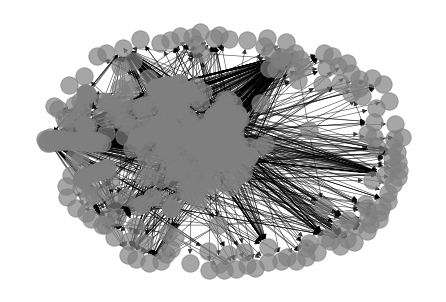

DiGraph with 710 nodes and 2018 edges


In [10]:
import matplotlib.pyplot as plt
for component in nx.weakly_connected_components(G):
    G_comp = nx.induced_subgraph(G,component)
    if G_comp.number_of_nodes() > 3:
        plt.figure()
        nx.draw_spring(G_comp, with_labels=False, alpha=0.7, width=0.6, node_color='gray')
        plt.show()

print(G_comp)

In [11]:
import matplotlib.pyplot as plt
ccs = sorted(nx.weakly_connected_components(G), key=len, reverse=True)
Giant = nx.induced_subgraph(G, ccs[0])
print(Giant)

DiGraph with 710 nodes and 2018 edges


DiGraph with 116 nodes and 498 edges


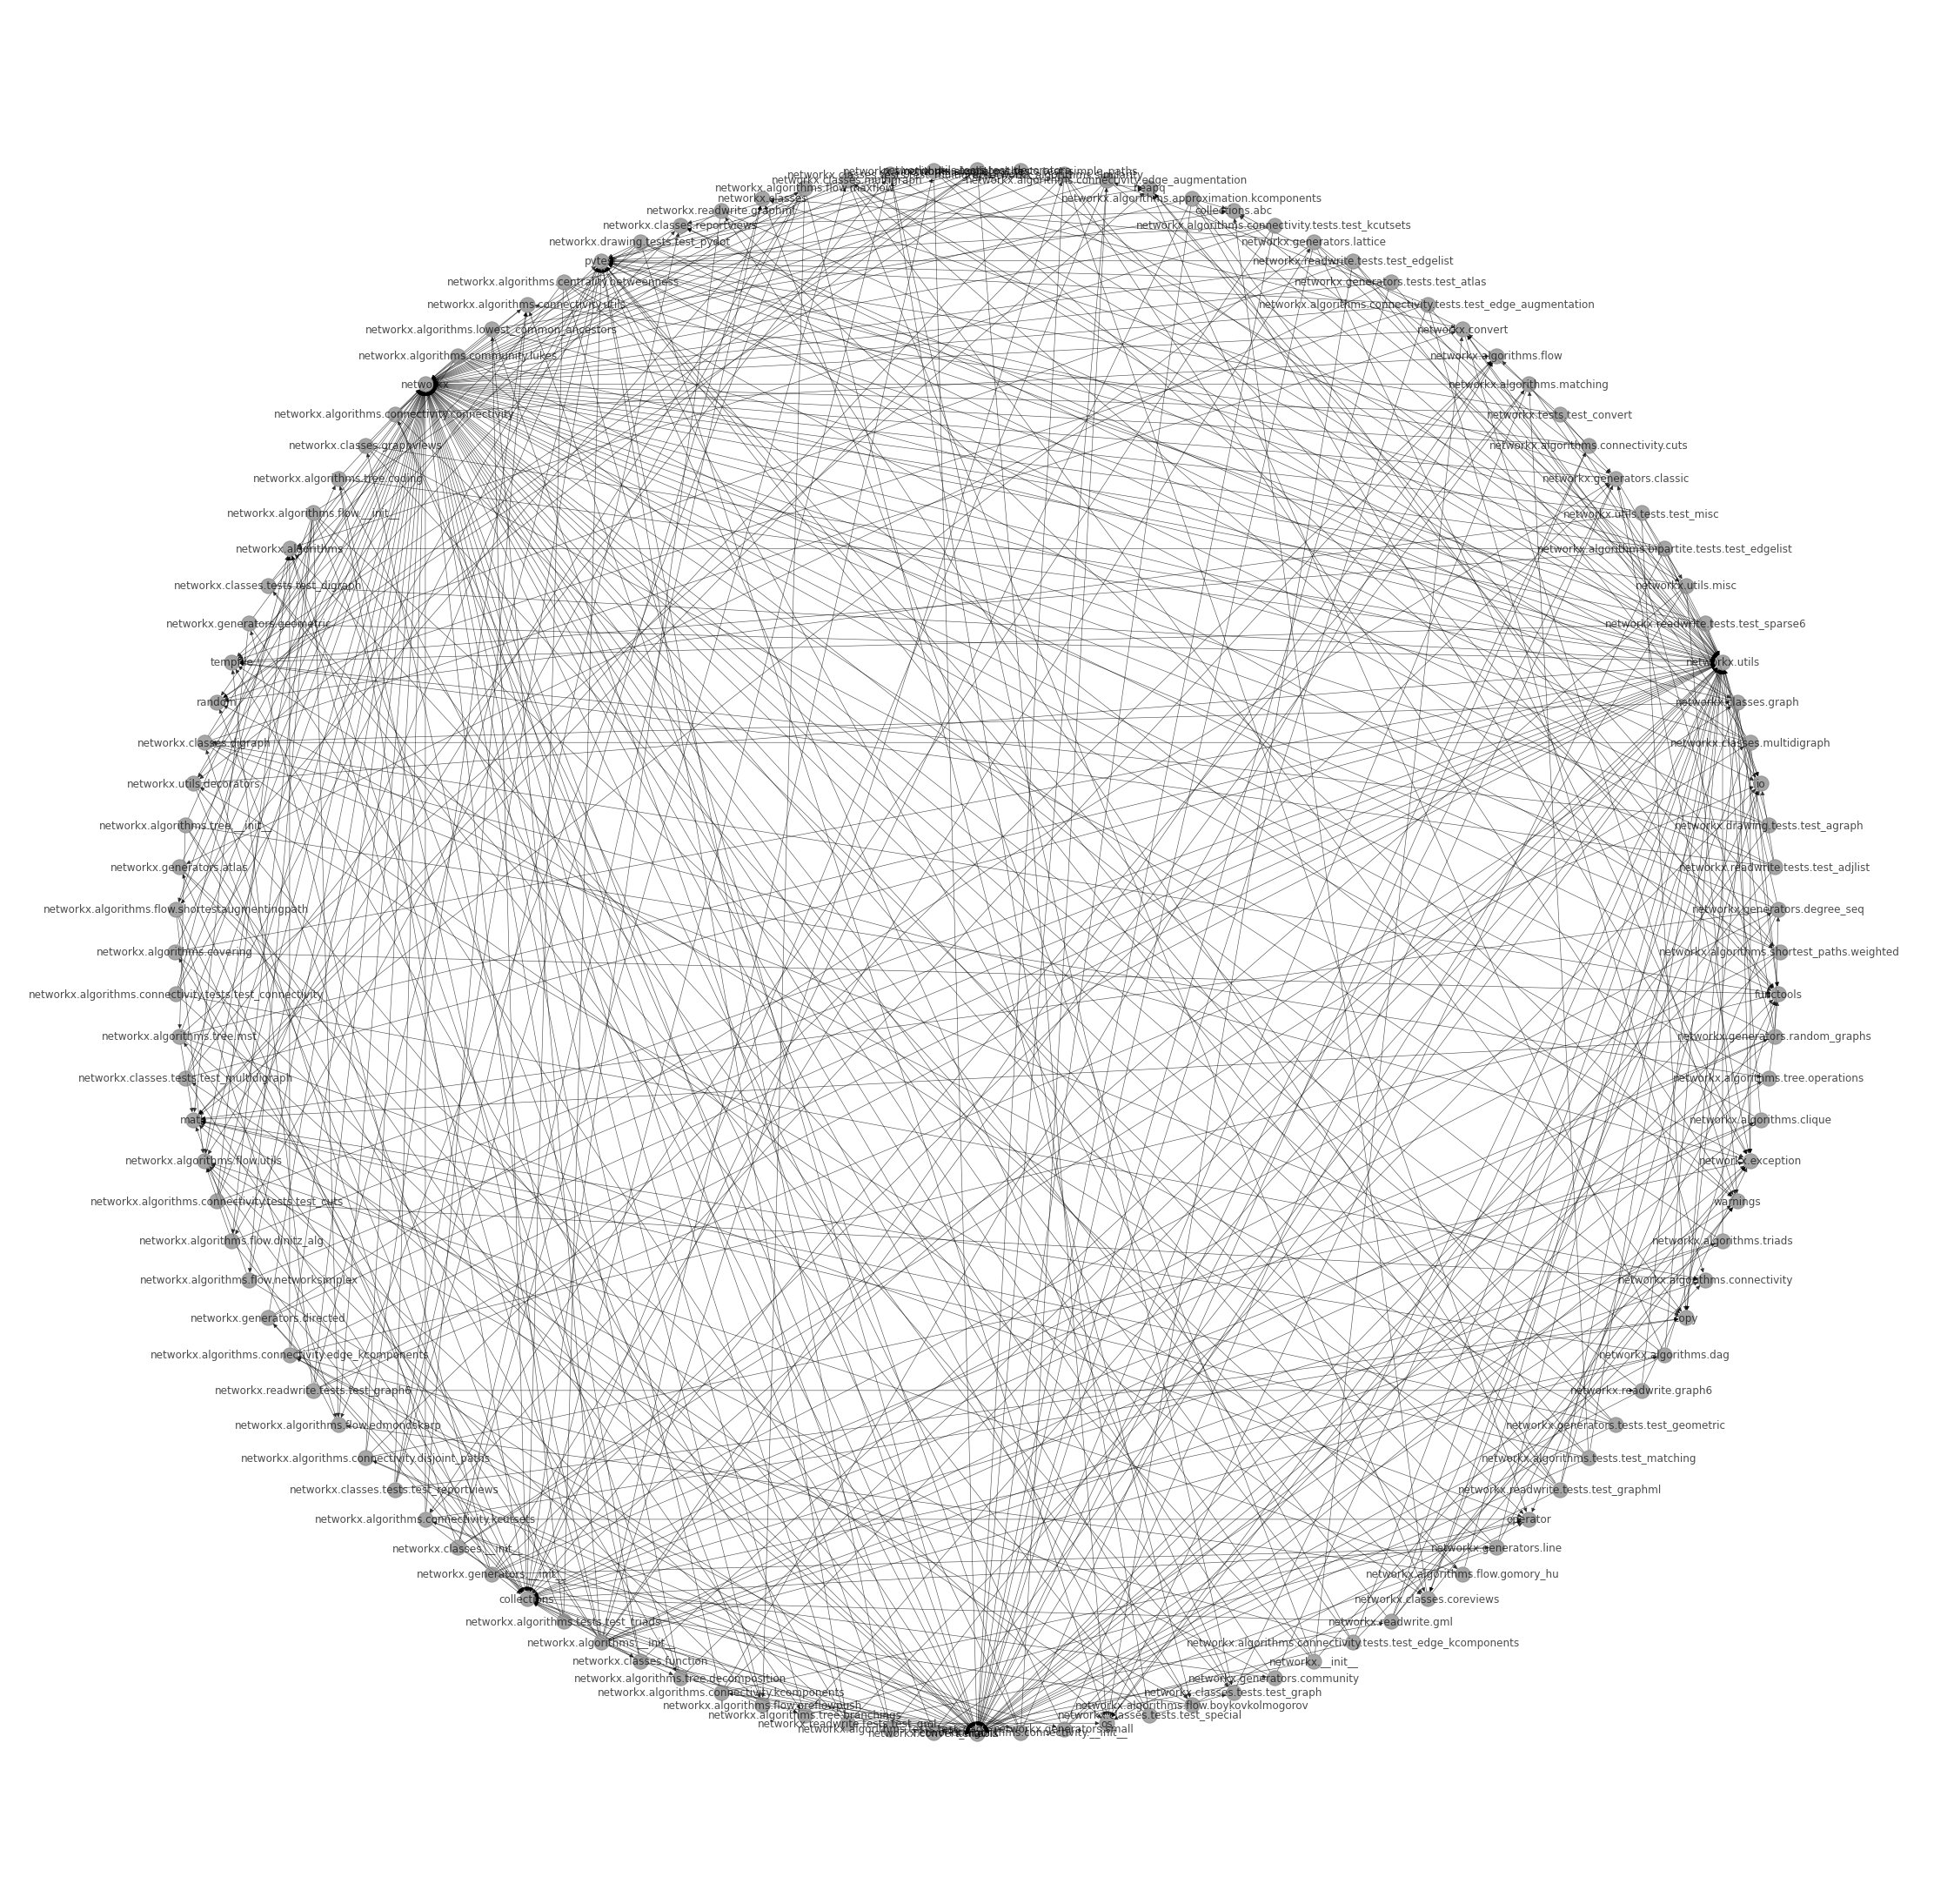

In [12]:
G_ = nx.k_core(Giant,k=5)
print(G_)
fig, ax = plt.subplots()
fig.set_size_inches(40,40)
nx.draw_circular(G_, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
plt.show()

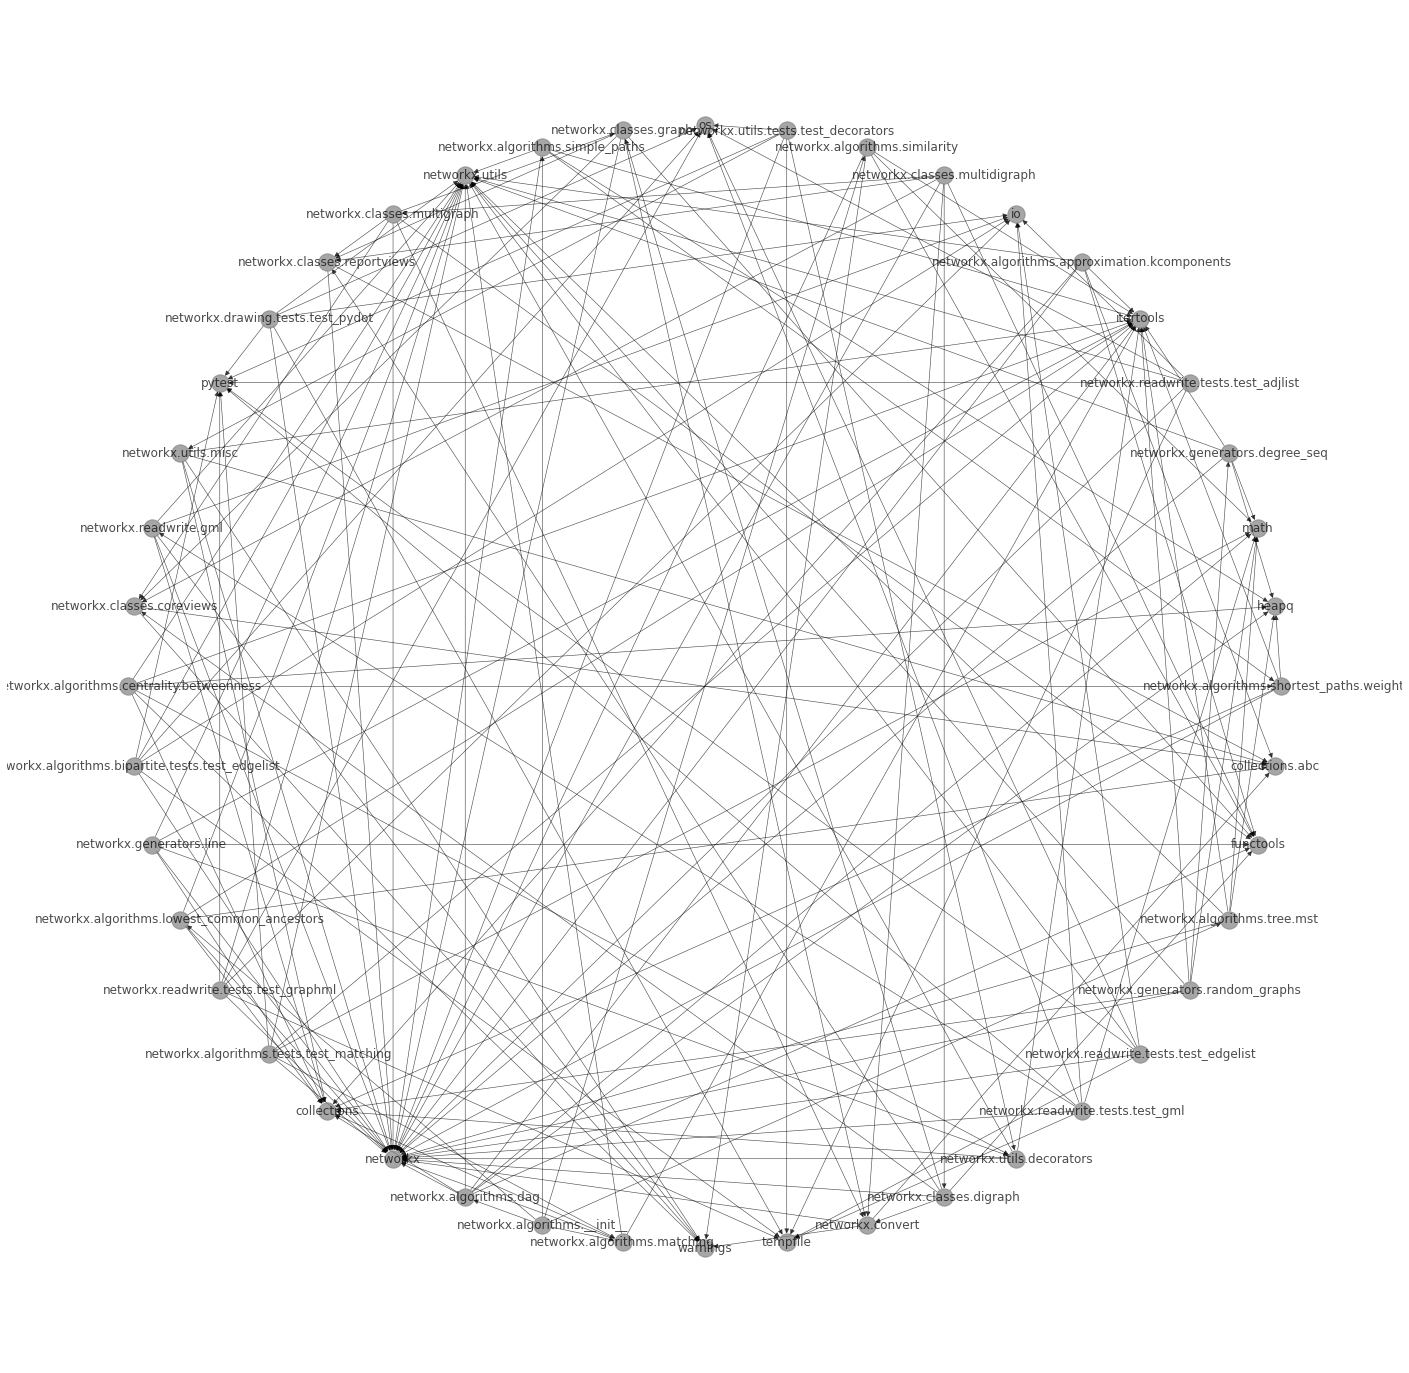

In [13]:
G_ = nx.k_core(Giant,k=6)
fig, ax = plt.subplots()
fig.set_size_inches(25,25)
nx.draw_circular(G_, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
plt.show()

5.6845070422535215


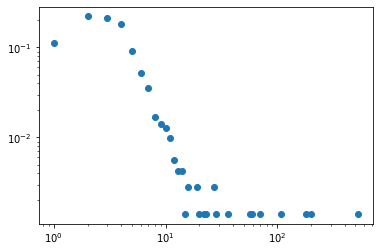

In [14]:
### Construction du graphe
import collections
import matplotlib.pyplot as plt
import numpy as np
degrees = [degree for (id_node, degree) in G.degree()]
print(np.mean(degrees))
xs = collections.Counter(degrees).keys()
ys = list(collections.Counter(degrees).values())
ys = [ y / np.sum(ys) for y in ys]

fig,ax = plt.subplots()
ax.set_yscale('log')
ax.set_xscale('log')
plt.scatter(xs,ys)

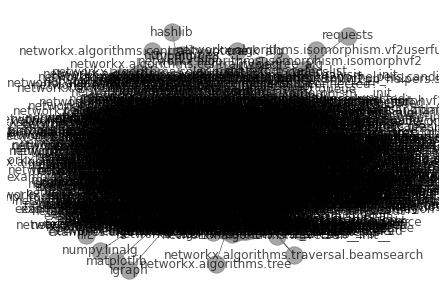

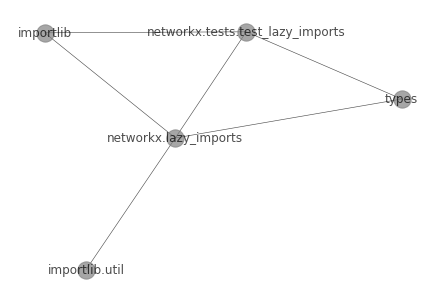

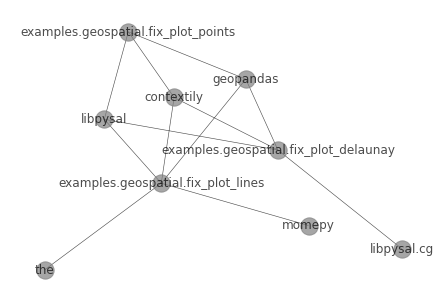

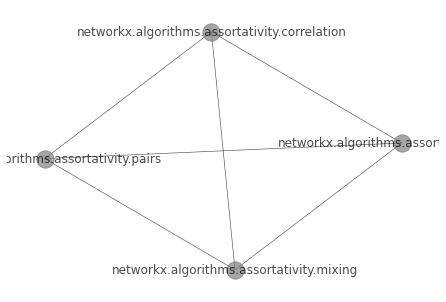

In [15]:
Giant = Giant.to_undirected()
coms = nx.algorithms.community.label_propagation.label_propagation_communities(Giant)
for com in coms:
    G_com = nx.induced_subgraph(Giant, com)
    if G_com.number_of_nodes() > 3:
        plt.figure()
        nx.draw_spring(G_com, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
        plt.show()


## Degree Entrant et Sortant

Counter({0: 350, 1: 210, 2: 73, 3: 23, 5: 11, 4: 9, 11: 3, 8: 3, 6: 3, 7: 3, 16: 2, 14: 2, 9: 2, 10: 2, 20: 1, 28: 1, 530: 1, 23: 1, 199: 1, 108: 1, 57: 1, 180: 1, 12: 1, 15: 1, 22: 1, 36: 1, 19: 1, 59: 1})


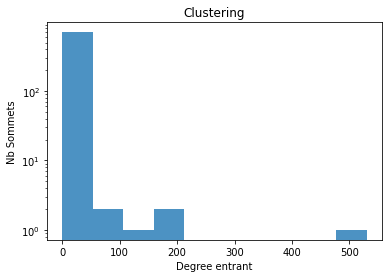

In [16]:
import collections
def degree_entrant(G):
    liste=[]
    for node in G.nodes:
        liste.append(G.in_degree(node))
    dico =collections.Counter(liste)
    print(dico)
    plt.hist(liste,log=10, alpha=0.8)
    plt.title('Clustering')
    plt.xlabel('Degree entrant')
    plt.ylabel('Nb Sommets')
    plt.show()
degree_entrant(G)

Counter({2: 190, 3: 126, 0: 119, 4: 95, 1: 66, 5: 52, 6: 25, 7: 17, 11: 5, 8: 5, 9: 3, 12: 2, 70: 1, 27: 1, 19: 1, 13: 1, 10: 1})


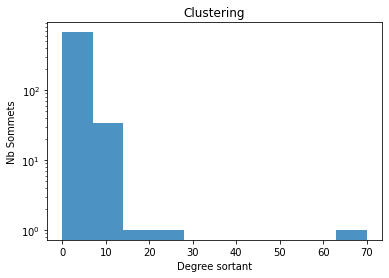

In [17]:
def degree_sortant(G):
    liste=[]
    for node in G.nodes:
        liste.append(G.out_degree(node))
    dico =collections.Counter(liste)
    print(dico)
    plt.hist(liste,log=10, alpha=0.8)
    plt.title('Clustering')
    plt.xlabel('Degree sortant')
    plt.ylabel('Nb Sommets')
    plt.show()
degree_sortant(G)

## Histogramme du clustering de chaque noeud

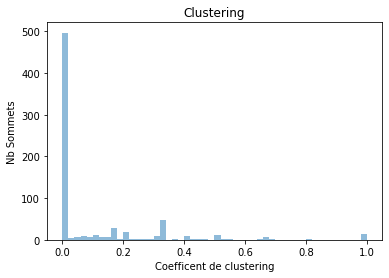

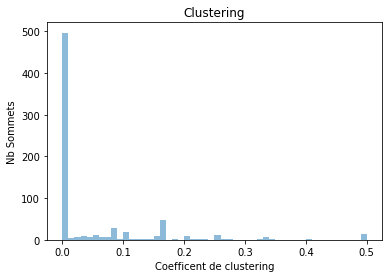

In [18]:
def clustering(G):
    plt.hist(nx.clustering(G).values(),bins=50, alpha=0.5)
    plt.title('Clustering')
    plt.xlabel('Coefficent de clustering')
    plt.ylabel('Nb Sommets')
    plt.show()
clustering(Giant)
clustering(G)


On peut conclure qu'en calculant le coefficient de clustering 
de chaque sommets du graphe G, les sommets ont un faible taux de connectivité.

### Le diamètre 

In [19]:
print("Le diamètre de Giant est :")
print(nx.algorithms.diameter(Giant))

Le diamètre de Giant est :
7


## Connexité du Graphe
On peut aussi déduire si le graphe est connexe ou non grâce aux composants
fortements connectés. puisqu'on a trouvé qu'un composant fortement
connecté alors le graphe est connexe sinon on aurait pu utiliser is_connected pour savoir si il est connexe.

In [20]:
print(nx.is_connected(Giant))

True


### Algorithme de Dijkstra
On va utiliser l'algorithme de Dijkstra pour connaître le plus long des courts chemins.

In [21]:

for u,v in G.edges:
    if nx.has_path(G, u, v):
        print(nx.shortest_path(G, u, v,weight="weight"))


['setup', 'glob']
['setup', 'os']
['setup', 'sys']
['setup', 'setuptools']
['networkx.__init__', 'networkx.lazy_imports']
['networkx.__init__', 'networkx.exception']
['networkx.__init__', 'networkx']
['networkx.__init__', 'networkx.classes']
['networkx.__init__', 'networkx.convert']
['networkx.__init__', 'networkx.convert_matrix']
['networkx.__init__', 'networkx.relabel']
['networkx.__init__', 'networkx.generators']
['networkx.__init__', 'networkx.readwrite']
['networkx.__init__', 'networkx.algorithms']
['networkx.__init__', 'networkx.linalg']
['networkx.__init__', 'networkx.drawing']
['networkx.lazy_imports', 'importlib']
['networkx.lazy_imports', 'importlib.util']
['networkx.lazy_imports', 'inspect']
['networkx.lazy_imports', 'os']
['networkx.lazy_imports', 'sys']
['networkx.lazy_imports', 'types']
['networkx.convert', 'warnings']
['networkx.convert', 'collections.abc']
['networkx.convert', 'networkx']
['networkx.convert_matrix', 'itertools']
['networkx.convert_matrix', 'warnings']
[

['networkx.algorithms.centrality.current_flow_betweenness_subset', 'networkx.utils']
['networkx.algorithms.centrality.degree_alg', 'networkx.utils.decorators']
['networkx.algorithms.centrality.eigenvector', 'math']
['networkx.algorithms.centrality.eigenvector', 'networkx']
['networkx.algorithms.centrality.eigenvector', 'networkx.utils']
['networkx.algorithms.centrality.group', 'copy']
['networkx.algorithms.centrality.group', 'networkx']
['networkx.algorithms.centrality.group', 'networkx.algorithms.centrality.betweenness']
['networkx.algorithms.centrality.group', 'networkx.utils.decorators']
['networkx.algorithms.centrality.harmonic', 'functools']
['networkx.algorithms.centrality.harmonic', 'networkx']
['networkx.algorithms.centrality.katz', 'math']
['networkx.algorithms.centrality.katz', 'networkx']
['networkx.algorithms.centrality.katz', 'networkx.utils']
['networkx.algorithms.centrality.percolation', 'networkx']
['networkx.algorithms.centrality.percolation', 'networkx.algorithms.cent

['networkx.algorithms.centrality.tests.test_katz_centrality', 'networkx']
['networkx.algorithms.centrality.tests.test_degree_centrality', 'pytest']
['networkx.algorithms.centrality.tests.test_degree_centrality', 'networkx']
['networkx.algorithms.centrality.tests.test_percolation_centrality', 'pytest']
['networkx.algorithms.centrality.tests.test_percolation_centrality', 'networkx']
['networkx.algorithms.centrality.tests.test_trophic', 'pytest']
['networkx.algorithms.centrality.tests.test_trophic', 'networkx']
['networkx.algorithms.centrality.tests.test_reaching', 'pytest']
['networkx.algorithms.centrality.tests.test_reaching', 'networkx']
['networkx.algorithms.centrality.tests.test_betweenness_centrality', 'pytest']
['networkx.algorithms.centrality.tests.test_betweenness_centrality', 'networkx']
['networkx.algorithms.centrality.tests.test_current_flow_betweenness_centrality_subset', 'pytest']
['networkx.algorithms.centrality.tests.test_current_flow_betweenness_centrality_subset', 'netwo

# 3.1 Structure et mesures sur le graphe

Comment identifier les packages critiques, dont la disparition mettrait en peril la librairie ? Comment
identifier l’impact d’un bug au sein d’un package sur le reste du code ?

Réponse : 

Pour identifier les packages critiques on va trier les degrés des sommets dans l'ordre décroissant pour ainsi prendre les sommets les plus connectés.

Pour identifier l'impact d'un bug au sein d'un package, on regarde le degré sortant d'un sommet.Plus il est grand plus l'impact sera importante.

In [22]:
degrees = sorted([(degree, id_node) for (id_node, degree) in G.degree()], reverse=True)
degrees[:50]

[(530, 'networkx'),
 (199, 'pytest'),
 (180, 'networkx.utils'),
 (108, 'itertools'),
 (70, 'networkx.algorithms.__init__'),
 (59, 'matplotlib.pyplot'),
 (57, 'collections'),
 (36, 'math'),
 (28, 'networkx.exception'),
 (27, 'networkx.utils.decorators'),
 (27, 'networkx.generators.__init__'),
 (23, 'networkx.algorithms'),
 (22, 'functools'),
 (20, 'os'),
 (19, 'random'),
 (19, 'networkx.algorithms.centrality.__init__'),
 (16, 'warnings'),
 (16, 'networkx.generators.classic'),
 (15, 'operator'),
 (14, 'networkx.algorithms.isomorphism.vf2pp'),
 (14, 'networkx.algorithms.approximation'),
 (14, 'io'),
 (13, 'networkx.readwrite.gml'),
 (13, 'networkx.generators.degree_seq'),
 (13, 'networkx.algorithms.approximation.__init__'),
 (12, 'tempfile'),
 (12, 'networkx.readwrite.__init__'),
 (12, 'networkx.algorithms.tree.mst'),
 (12, 'networkx.__init__'),
 (11, 'sys'),
 (11, 'networkx.readwrite.tests.test_gml'),
 (11, 'networkx.algorithms.flow.__init__'),
 (11, 'networkx.algorithms.centrality.betwe

Observe-t-on des schémas d’import circulaires ou A importe B qui importe C qui importe A ? Pourquoi à votre avis ?

Réponse:

Avec le code ci-dessous on prend tous les composants fortements connectés et on peut voir qu'il y en a pas, cela signifie donc qu'il n'y a pas de circuit par conséquent il n'y a pas de schémas d'import circulaires.Et en plus de celà c'est évident car le dossier networkx est une arborescence donc les fichiers n'ont qu'à prendre les fichiers pères tout simplement.

DiGraph with 1 nodes and 0 edges


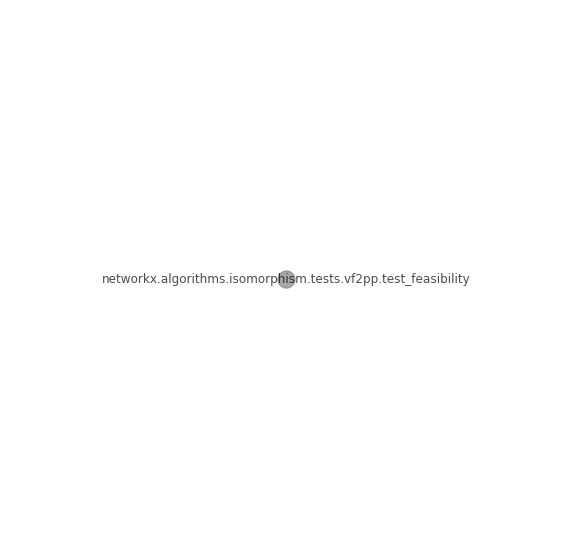

In [23]:
for component in nx.strongly_connected_components(G):
    G_Scomp = nx.induced_subgraph(G,component)

print(G_Scomp)
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
nx.draw_circular(G_Scomp, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
plt.show()




Au sein d’un même package (par exemple algorithms), les différents fichiers s’importent-ils entre eux ?
Ou importent-ils plutôt des fichiers externes à ce package ?

Réponse :

Ce n'est pas possible qu'ils utilisent des fichiers en dehors du même 

In [24]:

# c'est pas utile pour la fonction mais ca peut servir après

coms = nx.algorithms.community.label_propagation_communities(Giant)
#print(nx.modularity(Giant,coms))
for com in coms:
    G_com = nx.induced_subgraph(Giant, com)
    print(nx.density(G_com))
    

'''
communities_generator = nx.algorithms.community.girvan_newman(G)

top_level_communities = next(communities_generator)

next_level_communities = next(communities_generator)
print(top_level_communities)
print(next_level_communities)
'''

0.6666666666666666
0.00852175889103511
0.6
1.0
0.3333333333333333
0.6666666666666666
0.6666666666666666
0.6666666666666666
1.0


'\ncommunities_generator = nx.algorithms.community.girvan_newman(G)\n\ntop_level_communities = next(communities_generator)\n\nnext_level_communities = next(communities_generator)\nprint(top_level_communities)\nprint(next_level_communities)\n'

In [63]:
degre=[]
interne=dict()
li=[]
le=[]
externe=dict()
G_out=[node for node in G.nodes() if "algorithms" in node]
for value in G_out:
    neighbors=G.out_edges(value)
    for edge in neighbors:
        if "networkx.algorithms" in edge[0]:
            li.append(edge[0])
        else: 
            le.append(edge[1])
        interne[edge[0]]=li
        externe[edge[0]]=le

    #for edge in interne:
    #    if "networkx.algorithms" in edge:
    #        print(edge)
    #   else 
    #externe_a_algo
#ype(externe)
# print(externe)

In [40]:
print(externe)
#si l'affichage ne fonctionne pas c'est que la variable interne est trop grande 

{'networkx.algorithms.clique': ['matplotlib.pyplot', 'networkx', 'networkx.algorithms.bipartite', 'math', 'matplotlib.pyplot', 'networkx', 'multiprocessing', 'time', 'itertools', 'matplotlib.pyplot', 'networkx', 'networkx', 'random', 'networkx', 'matplotlib.pyplot', 'matplotlib.pyplot', 'networkx', 'networkx', 'matplotlib.pyplot', 'networkx', 'matplotlib.pyplot', 'matplotlib.pyplot', 'networkx', 'collections', 'matplotlib.pyplot', 'networkx', 'numpy', 'scipy.cluster', 'scipy.spatial', 'matplotlib.pyplot', 'networkx', 'numpy', 'matplotlib.pyplot', 'seaborn', 'networkx'], 'networkx.algorithms.dag': ['matplotlib.pyplot', 'networkx', 'networkx.algorithms.bipartite', 'math', 'matplotlib.pyplot', 'networkx', 'multiprocessing', 'time', 'itertools', 'matplotlib.pyplot', 'networkx', 'networkx', 'random', 'networkx', 'matplotlib.pyplot', 'matplotlib.pyplot', 'networkx', 'networkx', 'matplotlib.pyplot', 'networkx', 'matplotlib.pyplot', 'matplotlib.pyplot', 'networkx', 'collections', 'matplotlib.p

In [26]:
list(G.out_edges("networkx.algorithms.shortest_paths.weighted"))

[('networkx.algorithms.shortest_paths.weighted', 'collections'),
 ('networkx.algorithms.shortest_paths.weighted', 'heapq'),
 ('networkx.algorithms.shortest_paths.weighted', 'itertools'),
 ('networkx.algorithms.shortest_paths.weighted', 'networkx'),
 ('networkx.algorithms.shortest_paths.weighted',
  'networkx.algorithms.shortest_paths.generic')]

Quels sont les packages qui semblent les plus importés au sein de networkx ? A l’extérieur de networkx ? Pour deux de chaque catégorie, décrivez l’utilité de ces packages.

Réponse :

Les packages qui sont le plus importé au sein de networkx sont ceux qui ont le le plus de liaison dans cette même communauté. 
Au contraire, les fichiers qui semblent le plus importé en dehors de networkx sont ceux ou ils ont le plus de liaison en dehors de la communauté.

In [76]:
#décrire deux gros fichiers importés en interne ainsi qu'en externe 
# sort des tailles de interne et externe pour chaque key et renvoyer les plus grand

#aide pour le sort
#degrees = sorted([(degree, id_node) for (id_node, degree) in G.degree()], reverse=True)
#degrees[:50]


for key in interne:
    for value in interne:
        

[(530, 'networkx'),
 (199, 'pytest'),
 (180, 'networkx.utils'),
 (108, 'itertools'),
 (70, 'networkx.algorithms.__init__'),
 (59, 'matplotlib.pyplot'),
 (57, 'collections'),
 (36, 'math'),
 (28, 'networkx.exception'),
 (27, 'networkx.utils.decorators'),
 (27, 'networkx.generators.__init__'),
 (23, 'networkx.algorithms'),
 (22, 'functools'),
 (20, 'os'),
 (19, 'random'),
 (19, 'networkx.algorithms.centrality.__init__'),
 (16, 'warnings'),
 (16, 'networkx.generators.classic'),
 (15, 'operator'),
 (14, 'networkx.algorithms.isomorphism.vf2pp'),
 (14, 'networkx.algorithms.approximation'),
 (14, 'io'),
 (13, 'networkx.readwrite.gml'),
 (13, 'networkx.generators.degree_seq'),
 (13, 'networkx.algorithms.approximation.__init__'),
 (12, 'tempfile'),
 (12, 'networkx.readwrite.__init__'),
 (12, 'networkx.algorithms.tree.mst'),
 (12, 'networkx.__init__'),
 (11, 'sys'),
 (11, 'networkx.readwrite.tests.test_gml'),
 (11, 'networkx.algorithms.flow.__init__'),
 (11, 'networkx.algorithms.centrality.betwe

Existe-t-il des package dont la suppression n’aurait pas de conséquence sur networkx ? Comment les identifier ? 

Réponse :

Oui, on peut les identifier grâce a leurs nombres d'arêtes sortante qui est nul. 

In [2]:
#pas d'arêtes sortante pour qu'il n'y ait pas d'impact sur le reste du code 

## 3.2 Connexité et modèles aléatoires

Observe-t-on des groupes de packages complètement indépendants des autres ?

Réponse :

il en existe seulement si il n'y a pas d'aretes ni sortante ni entrante.

In [ ]:
#chercher les nodes ou il n'y a pas d'aretes adjacentes

Erdös-Rényi semble-t-il permettre de modéliser ce graphe ? Pourquoi ?

Réponse :

peut être 

In [ ]:
#Erdös-Rényi

atts-Strogatz semble-t-il permettre de pouvoir mod ́eliser un tel graphe ? Pourquoi ?

Réponse :

peut etre

In [ ]:
#Watts-Strogatz

Proposer un modèle simple qui vous semblerait adapté pour modéliser un tel graphe, et l’évaluer comme pour les précédents modèles.

In [ ]:
#il m'a littéralement dit de réfléchir

Comparer à deux graphes de dépendances identifiés ici : http://wwwlovre.appspot.com/support.jsp
- guava, scolt, junit, jung

In [ ]:
#il m'a littéralement dit de réfléchir